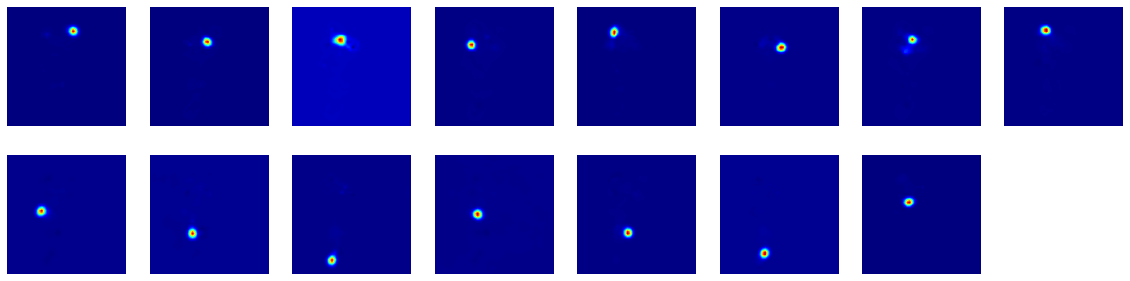

In [7]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation
import urllib

weightsFile = 'pose_iter_160000.caffemodel'
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"

nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

im = cv2.imread("Tiger_Woods_Crop.png")
im = im[:,:,::-1]
inWidth, inHeight = im.shape[0:2]

netInputSize = (368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)

output = net.forward()

plt.figure(figsize=(20, 5))
for i in range(nPoints):
    proMap = output[0, i, :, :]
    displayMap = cv2.resize(proMap, (inWidth, inHeight), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i + 1); plt.axis('off'); plt.imshow(displayMap, cmap='jet')